# importacion de dependencias

In [1]:
import numpy as np
import pandas as pd

import os
 
data_path = os.path.join(os.getcwd(), 'data')


# Importar la data de entrenamiento

In [2]:
train = pd.read_csv(os.path.join(data_path, 'train.csv'))
print(train.head())

         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10


In [3]:
# en date reemplazar los 2013 por 2020, y los 2014 por 2021, y los 2015 por 2022 y los 2016 por 2023 y los 2017 por 2024

train['date'] = train['date'].str.replace('2013', '2020')

train['date'] = train['date'].str.replace('2014', '2021')

train['date'] = train['date'].str.replace('2015', '2022')

train['date'] = train['date'].str.replace('2016', '2023')

train['date'] = train['date'].str.replace('2017', '2024')

In [4]:
train

,date,store,item,sales
0,2020-01-01,1,1,13
1,2020-01-02,1,1,11
2,2020-01-03,1,1,14
3,2020-01-04,1,1,13
4,2020-01-05,1,1,10
...,...,...,...,...
912995,2024-12-27,10,50,63
912996,2024-12-28,10,50,59
912997,2024-12-29,10,50,74
912998,2024-12-30,10,50,62


In [5]:
# eliminar la columna de store porque todo es del mismo store
train = train.drop(columns=['store'])
train

,date,item,sales
0,2020-01-01,1,13
1,2020-01-02,1,11
2,2020-01-03,1,14
3,2020-01-04,1,13
4,2020-01-05,1,10
...,...,...,...
912995,2024-12-27,50,63
912996,2024-12-28,50,59
912997,2024-12-29,50,74
912998,2024-12-30,50,62


In [6]:
train.dtypes 

date     object
item      int64
sales     int64
dtype: object

In [7]:
# Asegurarse de que la columna 'date' esté en formato datetime
train['date'] = pd.to_datetime(train['date'], errors='coerce')

# Eliminar filas con fechas inválidas
train = train.dropna(subset=['date'])

# Crear un diccionario para almacenar los precios iniciales de cada item
item_prices = {i: np.random.randint(60, 120) for i in range(1, 51)}

# Agregar una columna de precios al DataFrame
def calculate_price(row):
    years_since_2020 = row['date'].year - 2020
    initial_price = item_prices[row['item']]
    adjusted_price = initial_price * (1 + 0.10 * years_since_2020)
    return adjusted_price

train['item_price'] = train.apply(calculate_price, axis=1)

print(train.head())

        date  item  sales  item_price
0 2020-01-01     1     13        93.0
1 2020-01-02     1     11        93.0
2 2020-01-03     1     14        93.0
3 2020-01-04     1     13        93.0
4 2020-01-05     1     10        93.0


/tmp/ipykernel_13107/2463010214.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['item_price'] = train.apply(calculate_price, axis=1)


In [8]:
train

,date,item,sales,item_price
0,2020-01-01,1,13,93.0
1,2020-01-02,1,11,93.0
2,2020-01-03,1,14,93.0
3,2020-01-04,1,13,93.0
4,2020-01-05,1,10,93.0
...,...,...,...,...
912995,2024-12-27,50,63,116.2
912996,2024-12-28,50,59,116.2
912997,2024-12-29,50,74,116.2
912998,2024-12-30,50,62,116.2


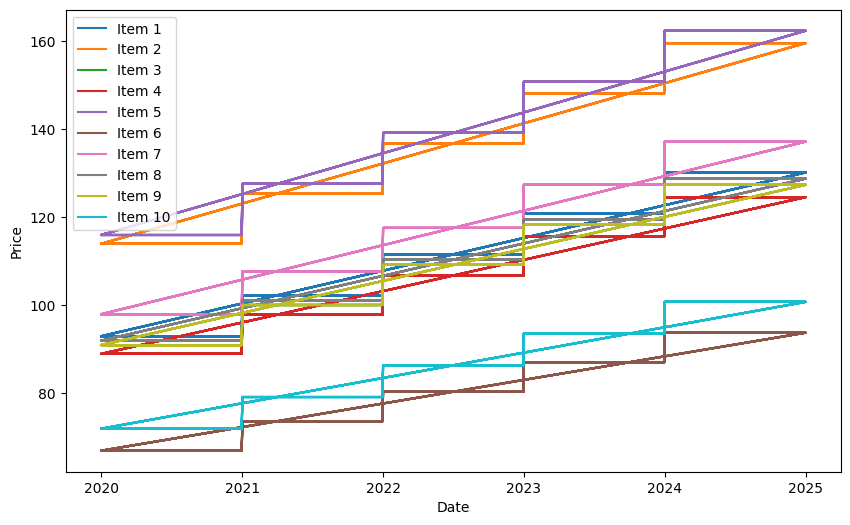

In [9]:
# hacer una grafica con los precios atraves del tiempo

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for i in range(1, 11):
    item_data = train[train['item'] == i]
    plt.plot(item_data['date'], item_data['item_price'], label=f'Item {i}')

plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.show()



In [10]:
from sklearn.model_selection import train_test_split

# Crear una nueva columna 'ganancias' que es la venta multiplicada por el precio del artículo
train['ganancias'] = train['sales'] * train['item_price']

# Seleccionar características relevantes
features = ['item', 'item_price', 'date']

# Crear variables dummies para la característica 'item' (si hay más de un artículo)
train = pd.get_dummies(train, columns=['item'], drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = train.drop(['sales', 'ganancias'], axis=1)
y = train['ganancias']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Asegurarse de que la columna 'date' esté en formato datetime
X_train['date'] = pd.to_datetime(X_train['date'])
X_test['date'] = pd.to_datetime(X_test['date'])

# Extraer características de la fecha
X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month
X_train['day'] = X_train['date'].dt.day
X_test['year'] = X_test['date'].dt.year
X_test['month'] = X_test['date'].dt.month
X_test['day'] = X_test['date'].dt.day

# Eliminar la columna 'date' ya que hemos extraído las características necesarias
X_train = X_train.drop(['date'], axis=1)
X_test = X_test.drop(['date'], axis=1)


/tmp/ipykernel_13107/2371969002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ganancias'] = train['sales'] * train['item_price']


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")


MSE: 4639522.338370272
R2: 0.6435474503713633


# modelo de prediccion de ventas

MSE: 956631.4413399281
R2: 0.6936781869969084


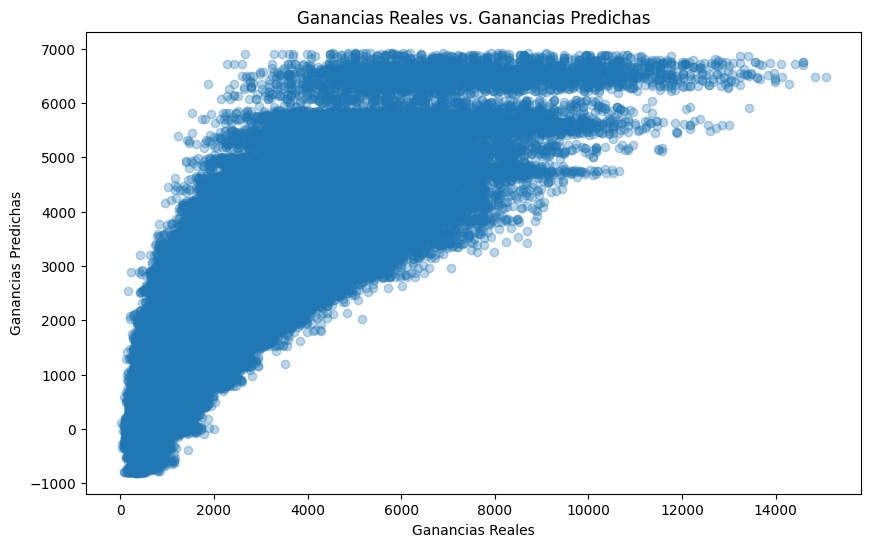

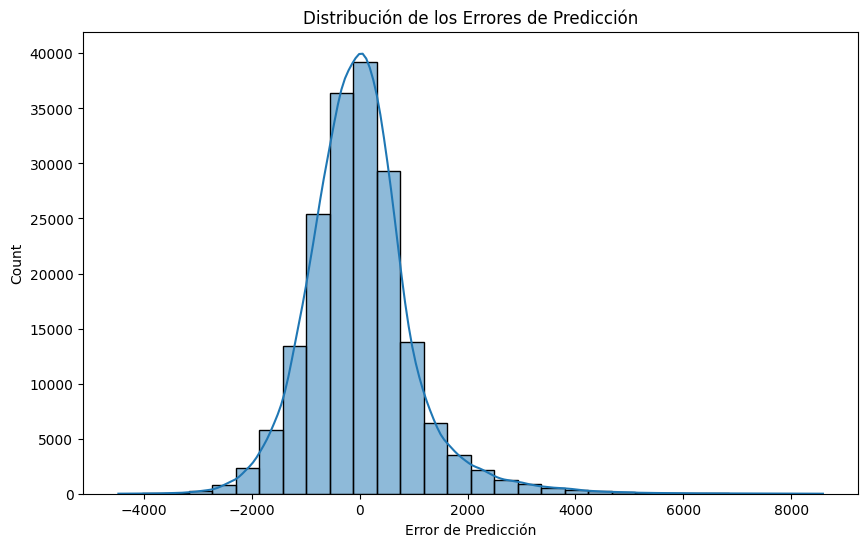

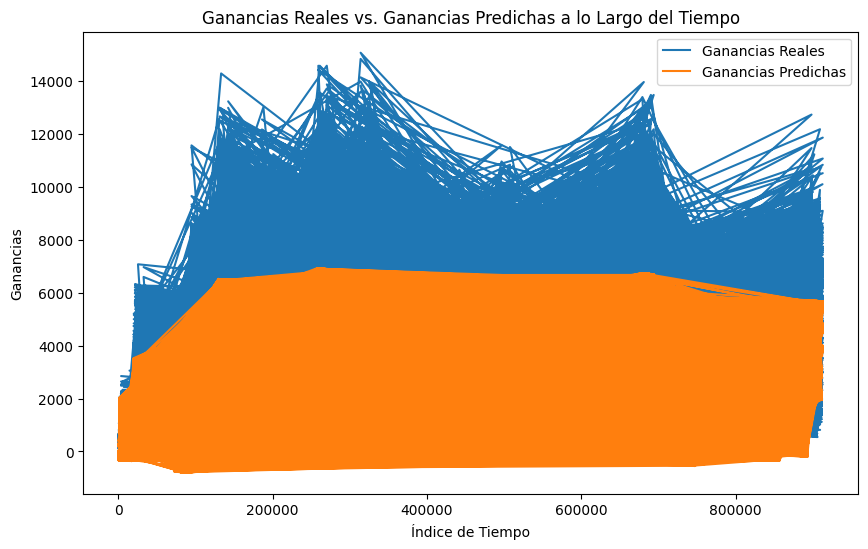

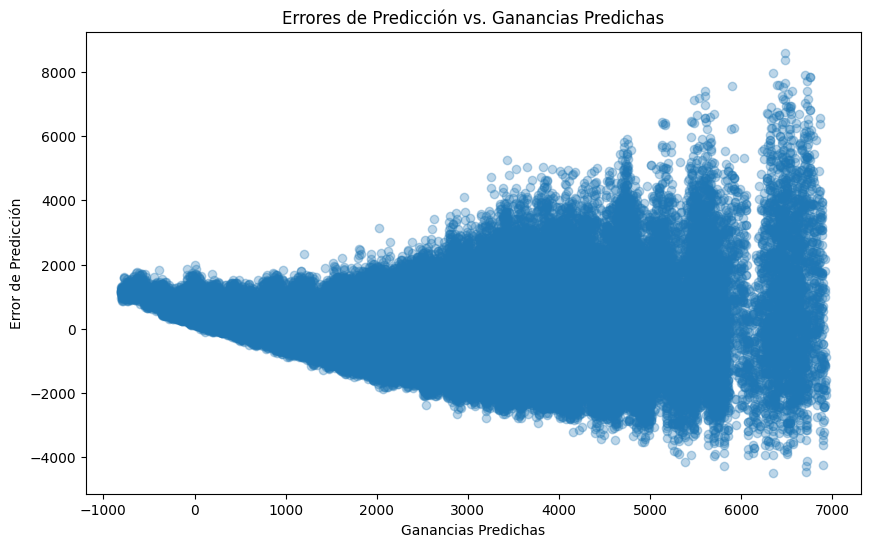

Scores de RMSE en cada fold: [1429.86593046 2146.04220912 1816.06626036 1697.26147238 1402.93800524]
RMSE Promedio: 1698.434775513324
Desviación Estándar de RMSE: 273.36368568779244


In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame desde el archivo CSV
data_path = os.path.join(os.getcwd(), 'data')
train = pd.read_csv(os.path.join(data_path, 'train.csv'))

# Asegurarse de que la columna 'date' esté en formato datetime
train['date'] = pd.to_datetime(train['date'], errors='coerce')

# Eliminar filas con fechas inválidas
train = train.dropna(subset=['date'])

# Crear un diccionario para almacenar los precios iniciales de cada item
item_prices = {i: np.random.randint(60, 120) for i in range(1, 51)}

# Agregar una columna de precios al DataFrame
def calculate_price(row):
    years_since_2020 = row['date'].year - 2020
    initial_price = item_prices[row['item']]
    adjusted_price = initial_price * (1 + 0.10 * years_since_2020)
    return adjusted_price

train['item_price'] = train.apply(calculate_price, axis=1)

# Crear una nueva columna 'ganancias' que es la venta multiplicada por el precio del artículo
train['ganancias'] = train['sales'] * train['item_price']

# Seleccionar características relevantes
features = ['item', 'item_price', 'date']

# Crear variables dummies para la característica 'item' (si hay más de un artículo)
train = pd.get_dummies(train, columns=['item'], drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = train.drop(['sales', 'ganancias'], axis=1)
y = train['ganancias']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extraer características de la fecha
X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month
X_train['day'] = X_train['date'].dt.day
X_test['year'] = X_test['date'].dt.year
X_test['month'] = X_test['date'].dt.month
X_test['day'] = X_test['date'].dt.day

# Eliminar la columna 'date' ya que hemos extraído las características necesarias
X_train = X_train.drop(['date'], axis=1)
X_test = X_test.drop(['date'], axis=1)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")

# Gráfico de las ganancias reales vs. las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Ganancias Reales')
plt.ylabel('Ganancias Predichas')
plt.title('Ganancias Reales vs. Ganancias Predichas')
plt.show()

# Histograma de los errores de predicción
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel('Error de Predicción')
plt.title('Distribución de los Errores de Predicción')
plt.show()

# Gráfico de línea de las ganancias reales vs. predichas a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label='Ganancias Reales')
plt.plot(X_test.index, y_pred, label='Ganancias Predichas')
plt.xlabel('Índice de Tiempo')
plt.ylabel('Ganancias')
plt.title('Ganancias Reales vs. Ganancias Predichas a lo Largo del Tiempo')
plt.legend()
plt.show()

# Gráfico de dispersión de errores de predicción vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, errors, alpha=0.3)
plt.xlabel('Ganancias Predichas')
plt.ylabel('Error de Predicción')
plt.title('Errores de Predicción vs. Ganancias Predichas')
plt.show()



# Asegurarse de que X no contiene la columna 'date'
X = X.drop(['date'], axis=1, errors='ignore')

# Realizar validación cruzada
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print("Scores de RMSE en cada fold:", rmse_scores)
print("RMSE Promedio:", rmse_scores.mean())
print("Desviación Estándar de RMSE:", rmse_scores.std())


MSE: 12217.297066737925
R2: 0.810543802994868


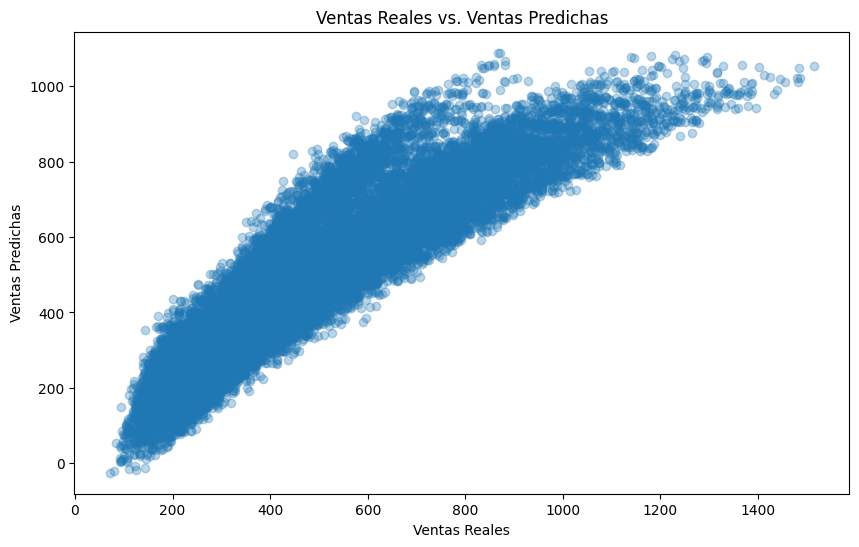

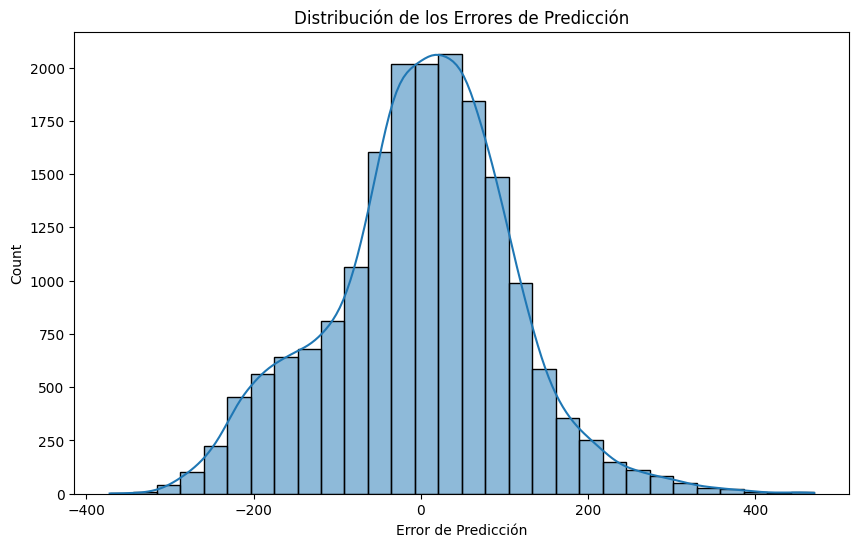

Scores de R2 en cada fold: [0.8128672  0.81244138 0.81170129 0.81630294 0.8097213 ]
R2 Promedio: 0.8126068217492122
Desviación Estándar de R2: 0.0021402198460055066


In [5]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el DataFrame desde el archivo CSV
data_path = os.path.join(os.getcwd(), 'data')  # Ruta al directorio 'data'
train = pd.read_csv(os.path.join(data_path, 'train.csv'))

# Asegurarse de que la columna 'date' esté en formato datetime
train['date'] = pd.to_datetime(train['date'], errors='coerce')

#Asegurarse que solo hay un registro por fecha y artículo
train = train.groupby(['date', 'item'], as_index=False)['sales'].sum()

# Eliminar filas con fechas inválidas
train = train.dropna(subset=['date'])

# Calcular ventas promedio por fecha y artículo
mean_sales = train.groupby(['date', 'item'])['sales'].mean().reset_index()

# Extraer características de tiempo adicionales
mean_sales['dayofweek'] = mean_sales['date'].dt.dayofweek
mean_sales['month'] = mean_sales['date'].dt.month
mean_sales['year'] = mean_sales['date'].dt.year

# Dividir los datos en conjuntos de entrenamiento y prueba
X = mean_sales[['date', 'item', 'dayofweek', 'month', 'year']]
y = mean_sales['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear variables dummy para la característica 'item' (si hay más de un artículo)
X_train = pd.get_dummies(X_train, columns=['item'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['item'], drop_first=True)

# Calcular la fecha mínima de X_train para la codificación de fecha
date_min = X_train['date'].min()

# Codificar la característica de fecha como días desde una fecha de referencia
X_train['date'] = (X_train['date'] - date_min).dt.days
X_test['date'] = (X_test['date'] - date_min).dt.days

# Crear y entrenar el modelo de regresión Ridge con búsqueda de hiperparámetros
ridge = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")

# Gráfico de las ventas reales vs. las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Ventas Reales vs. Ventas Predichas')
plt.show()

# Histograma de los errores de predicción
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel('Error de Predicción')
plt.title('Distribución de los Errores de Predicción')
plt.show()

# Realizar validación cruzada con el mejor modelo
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print("Scores de R2 en cada fold:", scores)
print("R2 Promedio:", scores.mean())
print("Desviación Estándar de R2:", scores.std())


In [6]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import holidays

# Cargar el DataFrame desde el archivo CSV
data_path = os.path.join(os.getcwd(), 'data')  # Ruta al directorio 'data'
train = pd.read_csv(os.path.join(data_path, 'train.csv'))

# Asegurarse de que la columna 'date' esté en formato datetime
train['date'] = pd.to_datetime(train['date'], errors='coerce')

# Asegurarse que solo hay un registro por fecha y artículo
train = train.groupby(['date', 'item'], as_index=False)['sales'].sum()

# Eliminar filas con fechas inválidas
train = train.dropna(subset=['date'])

# Calcular ventas promedio por fecha y artículo
mean_sales = train.groupby(['date', 'item'])['sales'].mean().reset_index()

# Extraer características de tiempo adicionales
mean_sales['dayofweek'] = mean_sales['date'].dt.dayofweek
mean_sales['month'] = mean_sales['date'].dt.month
mean_sales['year'] = mean_sales['date'].dt.year
mean_sales['dayofyear'] = mean_sales['date'].dt.dayofyear
mean_sales['is_weekend'] = mean_sales['date'].dt.dayofweek >= 5

# Agregar información sobre días festivos
us_holidays = holidays.US()
mean_sales['is_holiday'] = mean_sales['date'].isin(us_holidays)

# Convertir booleanos a enteros
mean_sales['is_weekend'] = mean_sales['is_weekend'].astype(int)
mean_sales['is_holiday'] = mean_sales['is_holiday'].astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = mean_sales[['date', 'item', 'dayofweek', 'month', 'year', 'dayofyear', 'is_weekend', 'is_holiday']]
y = mean_sales['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear variables dummy para la característica 'item' (si hay más de un artículo)
X_train = pd.get_dummies(X_train, columns=['item'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['item'], drop_first=True)

# Calcular la fecha mínima de X_train para la codificación de fecha
date_min = X_train['date'].min()

# Codificar la característica de fecha como días desde una fecha de referencia
X_train['date'] = (X_train['date'] - date_min).dt.days
X_test['date'] = (X_test['date'] - date_min).dt.days

# Crear interacciones entre características
X_train['date_item'] = X_train['date'] * X_train['item']
X_test['date_item'] = X_test['date'] * X_test['item']

# Crear y entrenar el modelo de regresión Ridge con búsqueda de hiperparámetros
ridge = Ridge()
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='r2')
ridge_grid_search.fit(X_train, y_train)

# Mejor modelo Ridge encontrado
best_ridge_model = ridge_grid_search.best_estimator_

# Predicciones con el mejor modelo Ridge
y_ridge_pred = best_ridge_model.predict(X_test)

# Evaluar el modelo Ridge
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)

print(f"Ridge - MSE: {ridge_mse}")
print(f"Ridge - R2: {ridge_r2}")

# Crear y entrenar el modelo de regresión Lasso con búsqueda de hiperparámetros
lasso = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid_search = GridSearchCV(lasso, lasso_param_grid, cv=5, scoring='r2')
lasso_grid_search.fit(X_train, y_train)

# Mejor modelo Lasso encontrado
best_lasso_model = lasso_grid_search.best_estimator_

# Predicciones con el mejor modelo Lasso
y_lasso_pred = best_lasso_model.predict(X_test)

# Evaluar el modelo Lasso
lasso_mse = mean_squared_error(y_test, y_lasso_pred)
lasso_r2 = r2_score(y_test, y_lasso_pred)

print(f"Lasso - MSE: {lasso_mse}")
print(f"Lasso - R2: {lasso_r2}")

# Gráfico de las ventas reales vs. las predicciones para el modelo Ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_ridge_pred, alpha=0.3)
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas (Ridge)')
plt.title('Ventas Reales vs. Ventas Predichas (Ridge)')
plt.show()

# Gráfico de las ventas reales vs. las predicciones para el modelo Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_lasso_pred, alpha=0.3)
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas (Lasso)')
plt.title('Ventas Reales vs. Ventas Predichas (Lasso)')
plt.show()

# Histograma de los errores de predicción para el modelo Ridge
ridge_errors = y_test - y_ridge_pred
plt.figure(figsize=(10, 6))
sns.histplot(ridge_errors, bins=30, kde=True)
plt.xlabel('Error de Predicción (Ridge)')
plt.title('Distribución de los Errores de Predicción (Ridge)')
plt.show()

# Histograma de los errores de predicción para el modelo Lasso
lasso_errors = y_test - y_lasso_pred
plt.figure(figsize=(10, 6))
sns.histplot(lasso_errors, bins=30, kde=True)
plt.xlabel('Error de Predicción (Lasso)')
plt.title('Distribución de los Errores de Predicción (Lasso)')
plt.show()

# Realizar validación cruzada con el mejor modelo Ridge
ridge_scores = cross_val_score(best_ridge_model, X_train, y_train, cv=5, scoring='r2')
print("Ridge - Scores de R2 en cada fold:", ridge_scores)
print("Ridge - R2 Promedio:", ridge_scores.mean())
print("Ridge - Desviación Estándar de R2:", ridge_scores.std())

# Realizar validación cruzada con el mejor modelo Lasso
lasso_scores = cross_val_score(best_lasso_model, X_train, y_train, cv=5, scoring='r2')
print("Lasso - Scores de R2 en cada fold:", lasso_scores)
print("Lasso - R2 Promedio:", lasso_scores.mean())
print("Lasso - Desviación Estándar de R2:", lasso_scores.std())


ModuleNotFoundError: No module named 'holidays'